**Introduction**
___
- Tidy data
    - every column is a feature
    - every row is an observation for each variable
    - Pandas dataframe .shape attribute
- high dimensionality > 10 columns
- When to use dimensionality reduction?
    - drop columns with no variance (i.e. same values)
    - Pandas dataframe .describe() method
        - no variance = std = 0, max and min are the same
        - exclude = 'number' --> will show information for non-numeric values
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.columns
pokemon_df['Type'] = pokemon_df['Type 1']

In [3]:
#Removing features without variance

#A sample of the Pokemon dataset has been loaded as pokemon_df. To
#get an idea of which features have little variance you should use
#the IPython Shell to calculate summary statistics on this sample.
#Then adjust the code to create a smaller, easier to understand,
#dataset.

# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

#################################################
#<script.py> output:
#       HP  Attack  Defense                   Name   Type
#    0  45      49       49              Bulbasaur  Grass
#    1  60      62       63                Ivysaur  Grass
#    2  80      82       83               Venusaur  Grass
#    3  80     100      123  VenusaurMega Venusaur  Grass
#    4  39      52       43             Charmander   Fire
#################################################
#All Pokemon in this dataset are non-legendary and from generation
#one so you could choose to drop those two features.

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


**Feature selection vs feature extraction**
___
- Why reduce dimensionality?
    - your dataset will:
        - be less complex
        - require less disk space
        - have lower chance of model overfitting
- Feature selection
    - .drop('column name', axis=1) [axis indicates column instead of row]
- Building a pairplot
    - sns.pairplot(data, hue='', diag_kind='hist')
- Feature extraction
    - calculating new feature(s) from original feature(s)
___

In [9]:
import seaborn as sns
ansur_df_11 = pd.concat([pd.read_csv('./ANSUR_II_FEMALE.csv').iloc[:200], pd.read_csv('./ANSUR_II_MALE.csv').iloc[:200]],ignore_index=True)
ansur_df_22 = pd.concat([pd.read_csv('./ANSUR_II_FEMALE.csv').iloc[200:], pd.read_csv('./ANSUR_II_MALE.csv').iloc[200:]],ignore_index=True)

In [19]:
# height(m) = sqrt(weight(kg) / BMI)
ansur_df_11['body_height'] = np.sqrt(ansur_df_11['weight_kg']) / ansur_df_11['BMI']*100*2
ansur_df_22['body_height'] = np.sqrt(ansur_df_22['weight_kg']) / ansur_df_22['BMI']*100*2
ansur_df_1 = ansur_df_11[['Gender',  'weight_kg',  'stature_m',  'body_height']]
ansur_df_2 = ansur_df_22[['Gender',  'weight_kg',  'stature_m',  'body_height']]
ansur_df_1

,Gender,weight_kg,stature_m,body_height
0,Female,65.7,1.560,60.047718
1,Female,53.4,1.665,75.873102
2,Female,66.3,1.711,71.907344
3,Female,78.2,1.660,62.322203
4,Female,88.6,1.572,52.507122
...,...,...,...,...
395,Male,71.1,1.800,76.849351
396,Male,67.8,1.715,71.440321
397,Male,78.2,1.842,76.737186
398,Male,90.9,1.710,61.339506


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


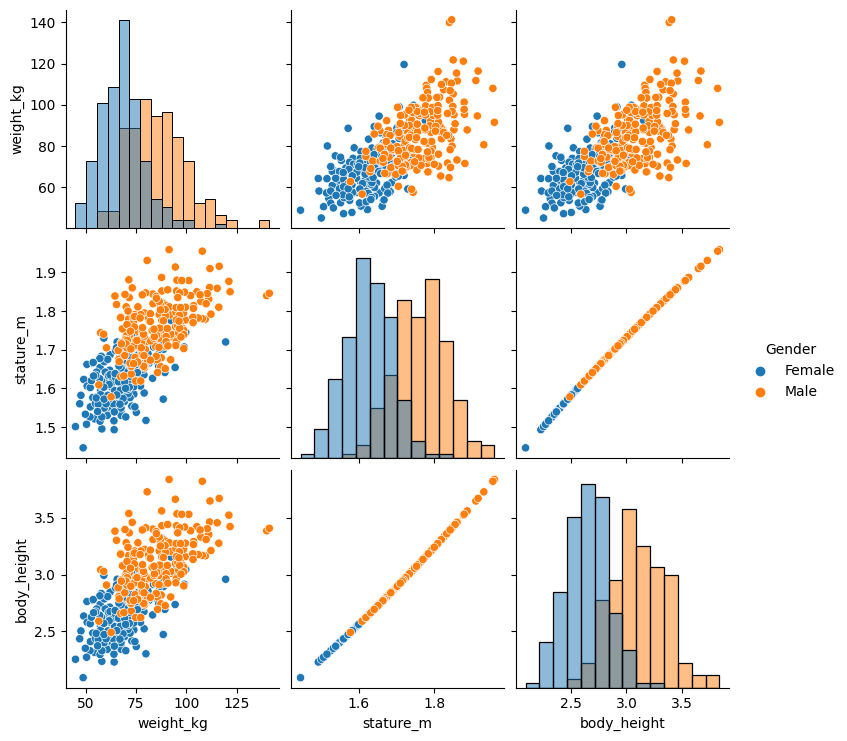

In [15]:
#Visually detecting redundant features
#Data visualization is a crucial step in any data exploration. Let's
#use Seaborn to explore some samples of the US Army ANSUR body
#measurement dataset.

#Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

#Seaborn has been imported as sns.

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
# Show the plot
plt.show()

![_images/13.1.svg](_images/13.1.svg)

In [16]:
ansur_df_1

,Gender,weight_kg,stature_m,body_height
0,Female,65.7,1.560,2.433600
1,Female,53.4,1.665,2.772225
2,Female,66.3,1.711,2.927521
3,Female,78.2,1.660,2.755600
4,Female,88.6,1.572,2.471184
...,...,...,...,...
395,Male,71.1,1.800,3.240000
396,Male,67.8,1.715,2.941225
397,Male,78.2,1.842,3.392964
398,Male,90.9,1.710,2.924100


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


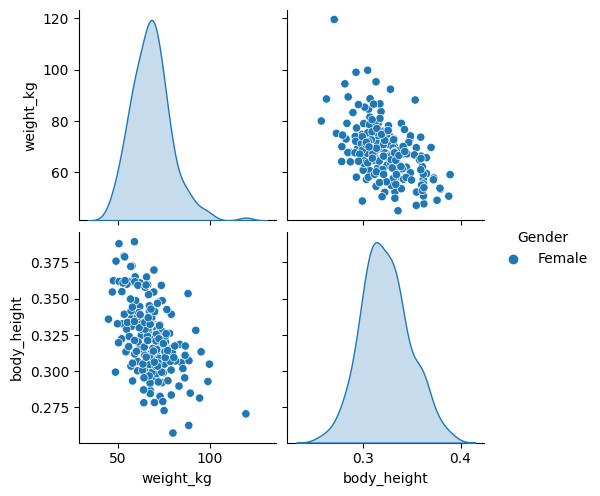

In [ ]:
#Two features are basically duplicates, remove one of them from
#the dataset.

# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

![_images/13.2.svg](_images/13.2.svg)
the body height (inches) and stature (meters) hold the same information in a different unit

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


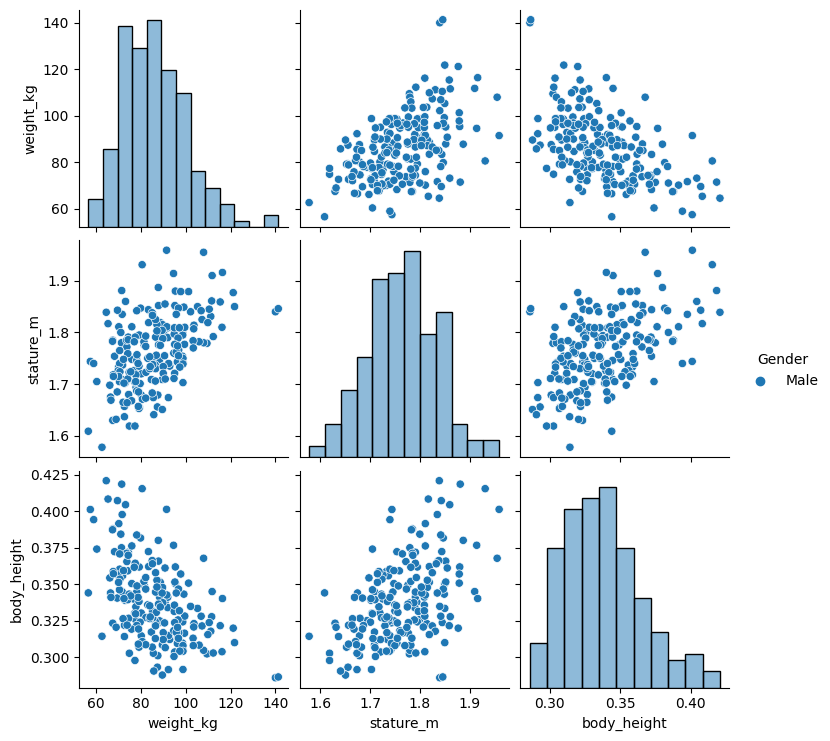

In [ ]:
#Now create a pairplot of the ansur_df_2 data sample and color the
# points using the 'Gender' feature.

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

![_images/13.3.svg](_images/13.3.svg)

In [ ]:
#One feature has no variance, remove it from the dataset.
# Remove the redundant feature
ansur_df_2 = ansur_df_22[['Gender', 'footlength', 'headlength', 'n_legs']]
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

KeyError: "['n_legs'] not in index"

**t-SNE visualization of high-dimensional data**
___
- t-distributed stochastic neighbor embedding
- t-SNE maximizes distance in 2-dimensional space between dimensions in higher dimensional space
- does not work with non-numeric values
- learning rate (10-1000) - lower number is conservative
___

In [ ]:
#Fitting t-SNE to the ANSUR data

#t-SNE is a great technique for visual exploration of high dimensional
#datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll
#remove non-numeric columns from the pre-loaded dataset df and fit TSNE to
#this numeric dataset.

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)

#################################################
#t-SNE reduced the more than 90 features in the dataset to just 2
#which you can now plot.
#################################################